In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GlobalAveragePooling1D, GlobalMaxPooling1D, Dropout, Embedding
from tensorflow.keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.layers import Bidirectional
from sklearn.ensemble import RandomForestClassifier

/home/neptune/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/neptune/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/neptune/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/neptune/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
train = pd.read_csv("preprocessed_train_data.csv", index_col = 0)
test = pd.read_csv("preprocessed_test_data.csv", index_col = 0)

trained_tweets = train['keyword']+train['text']
test_tweets = test['keyword']+test['text']

In [3]:
state = 12  
test_size = 0.30
  
X_train, X_test, y_train, y_test = train_test_split(trained_tweets, train['target'],  
    test_size=test_size, random_state=state)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    lowercase=True,
    min_df=5,
    max_features=30000)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    stop_words='english',
    ngram_range=(3, 6),
    lowercase=True,
    min_df=5,
    max_features=50000)

vectorizer = FeatureUnion([('word_vectorizer', word_vectorizer),  ('char_vectorizer', char_vectorizer)])
vectorizer.fit(X_train)

X_train_vectors = vectorizer.transform(X_train).toarray()
X_test_vectors = vectorizer.transform(X_test).toarray()
print(X_train_vectors.shape, X_test_vectors.shape)

/home/neptune/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


(5329, 44132) (2284, 44132)


In [5]:
gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.075, max_features=100, max_depth=25, random_state=0)
gb_clf.fit(X_train_vectors, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=25,
                           max_features=100, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
cv = CountVectorizer()
cv_x_train = cv.fit_transform(X_train).toarray()
cv_x_test = cv.transform(X_test).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(cv_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_vectors, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
## Tokenize the sentences
max_features=50000
maxlen=25
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train.tolist())
X_train = tokenizer.texts_to_sequences(X_train.tolist())
X_test = tokenizer.texts_to_sequences(X_test.tolist())

## Pad the sentences 
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

vocab_dim = X_train.max() + 1
embed_dim = int(np.sqrt(vocab_dim))
print(vocab_dim, embed_dim)
model = Sequential([
    Embedding(input_dim=vocab_dim, output_dim=embed_dim),
    SimpleRNN(units=embed_dim, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
history = model.fit(
    x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test), shuffle=True
)


9695 98
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5329 samples, validate on 2284 samples
Epoch 1/5
5329/5329 [==============================] - 2s 377us/sample - loss: 0.5922 - acc: 0.6705 - val_loss: 0.4974 - val_acc: 0.7754
Epoch 2/5
5329/5329 [==============================] - 2s 378us/sample - loss: 0.2541 - acc: 0.9037 - val_loss: 0.5693 - val_acc: 0.7504
Epoch 3/5
5329/5329 [==============================] - 2s 306us/sample - loss: 0.1103 - acc: 0.9668 - val_loss: 0.6469 - val_acc: 0.7474
Epoch 4/5
5329/5329 [==============================] - 1s 262us/sample - loss: 0.0732 - acc: 0.9749 - val_loss: 0.6773 - val_acc: 0.7347
Epoch 5/5
5329/5329 [==============================] - 1s 238us/sa

In [9]:
bi = Sequential([
    Embedding(input_dim=vocab_dim, output_dim=embed_dim),
    Bidirectional(SimpleRNN(units=embed_dim, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])
bi.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
history = model.fit(
    x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test), shuffle=True
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 5329 samples, validate on 2284 samples
Epoch 1/5
5329/5329 [==============================] - 1s 219us/sample - loss: 0.0622 - acc: 0.9794 - val_loss: 0.7148 - val_acc: 0.7588
Epoch 2/5
5329/5329 [==============================] - 1s 223us/sample - loss: 0.0497 - acc: 0.9824 - val_loss: 0.7803 - val_acc: 0.7189
Epoch 3/5
5329/5329 [==============================] - 1s 216us/sample - loss: 0.0464 - acc: 0.9824 - val_loss: 0.7362 - val_acc: 0.7465
Epoch 4/5
5329/5329 [==============================] - 1s 218us/sample - loss: 0.0401 - acc: 0.9820 - val_loss: 0.7665 - val_acc: 0.7535
Epoch 5/5
5329/5329 [=============================

In [10]:
lstm = Sequential([
    Embedding(input_dim=vocab_dim, output_dim=embed_dim),
    LSTM(units=embed_dim, return_sequences=False),
    Dense(1, activation='sigmoid')
])
lstm.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
lstm.fit(
    x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test), shuffle=True
)

Train on 5329 samples, validate on 2284 samples
Epoch 1/5
5329/5329 [==============================] - 3s 642us/sample - loss: 0.5672 - acc: 0.6984 - val_loss: 0.4545 - val_acc: 0.7964
Epoch 2/5
5329/5329 [==============================] - 3s 523us/sample - loss: 0.3097 - acc: 0.8750 - val_loss: 0.4879 - val_acc: 0.7903
Epoch 3/5
5329/5329 [==============================] - 3s 543us/sample - loss: 0.1898 - acc: 0.9306 - val_loss: 0.5942 - val_acc: 0.7767
Epoch 4/5
5329/5329 [==============================] - 3s 586us/sample - loss: 0.1265 - acc: 0.9546 - val_loss: 0.7153 - val_acc: 0.7675
Epoch 5/5
5329/5329 [==============================] - 3s 554us/sample - loss: 0.0965 - acc: 0.9700 - val_loss: 0.7489 - val_acc: 0.7736


In [11]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(cv_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
linear = SVC(kernel='linear', probability = True)
linear.fit(X_train_vectors, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
rf = RandomForestClassifier(n_estimators=130, 
                               random_state=50, 
                               max_features = 50,
                               max_depth = 200,
                               n_jobs=-1, verbose = 1, warm_start = True)
rf.fit(X_train_vectors, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   16.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=True)

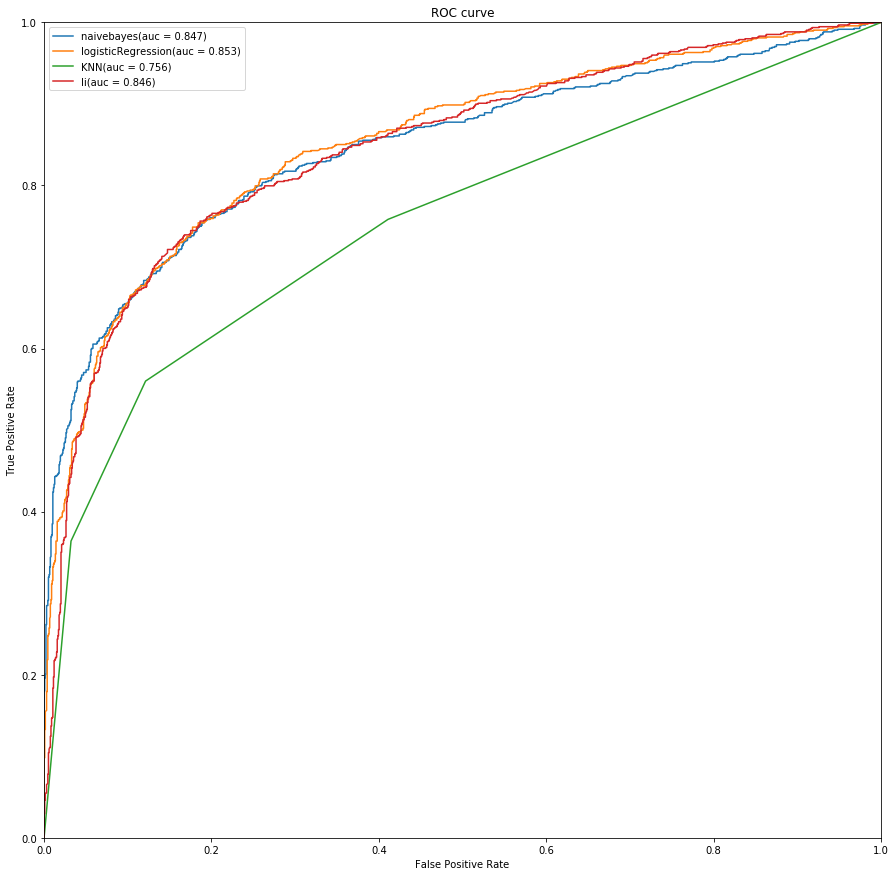

In [17]:
from sklearn.metrics import roc_curve, auc

y_nb  = clf_nb.predict_proba(cv_x_test)
curve_nb   = roc_curve(y_test, y_nb[:, 1])
auc_nb  = auc(curve_nb[0], curve_nb[1])

y_lr  = logisticRegr.predict_proba(X_test_vectors)
curve_lr   = roc_curve(y_test, y_lr[:, 1])
auc_lr  = auc(curve_lr[0], curve_lr[1])

y_knn  = classifier.predict_proba(cv_x_test)
curve_knn   = roc_curve(y_test, y_knn[:, 1])
auc_knn  = auc(curve_knn[0], curve_knn[1])

y_li = linear.predict_proba(X_test_vectors)
curve_li = roc_curve(y_test, y_li[:,1])
auc_li = auc(curve_li[0], curve_li[1])



plt.figure(figsize = (15,15))
plt.plot(curve_nb[0], curve_nb[1], label='naivebayes(auc = %0.3f)' % auc_nb)
plt.plot(curve_lr[0], curve_lr[1], label='logisticRegression(auc = %0.3f)' % auc_lr)
plt.plot(curve_knn[0], curve_knn[1], label='KNN(auc = %0.3f)' % auc_knn)
plt.plot(curve_li[0], curve_li[1], label='li(auc = %0.3f)' % auc_li)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();

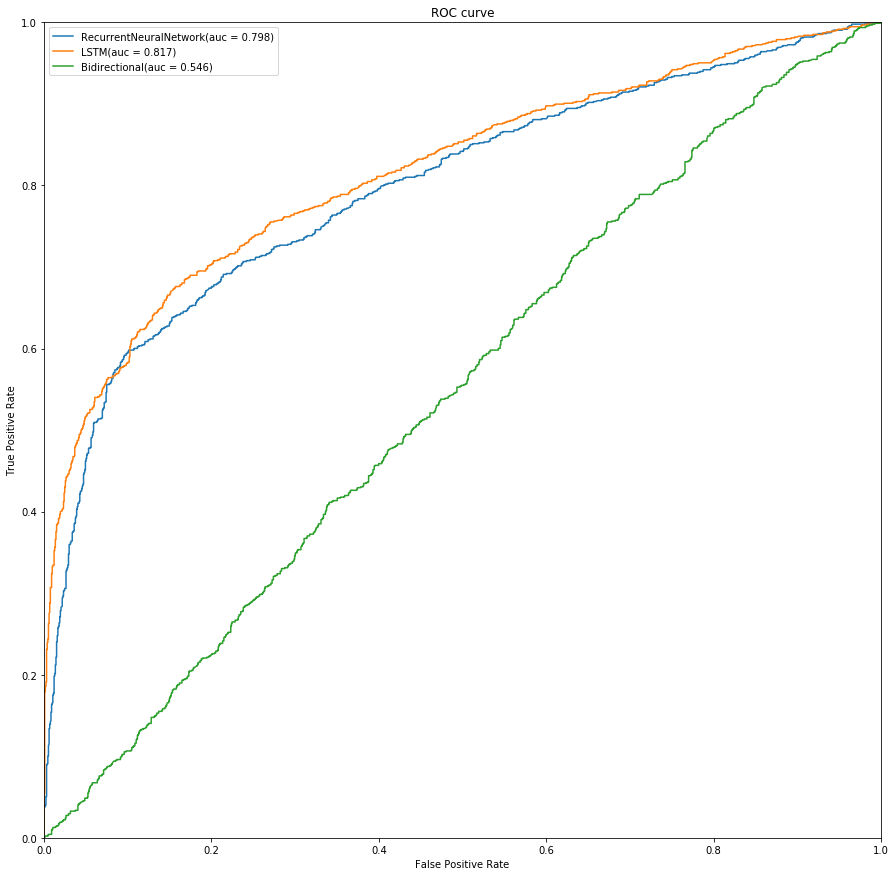

In [18]:
y_rnn  = model.predict_proba(X_test)
curve_rnn   = roc_curve(y_test, y_rnn)
auc_rnn  = auc(curve_rnn[0], curve_rnn[1])

y_lstm  = lstm.predict_proba(X_test)
curve_lstm   = roc_curve(y_test, y_lstm)
auc_lstm  = auc(curve_lstm[0], curve_lstm[1])

y_bi  = bi.predict_proba(X_test)
curve_bi   = roc_curve(y_test, y_bi)
auc_bi  = auc(curve_bi[0], curve_bi[1])


plt.figure(figsize = (15,15))

plt.plot(curve_rnn[0], curve_rnn[1], label='RecurrentNeuralNetwork(auc = %0.3f)' % auc_rnn)
plt.plot(curve_lstm[0], curve_lstm[1], label='LSTM(auc = %0.3f)' % auc_lstm)
plt.plot(curve_bi[0], curve_bi[1], label='Bidirectional(auc = %0.3f)' % auc_bi)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    0.2s finished


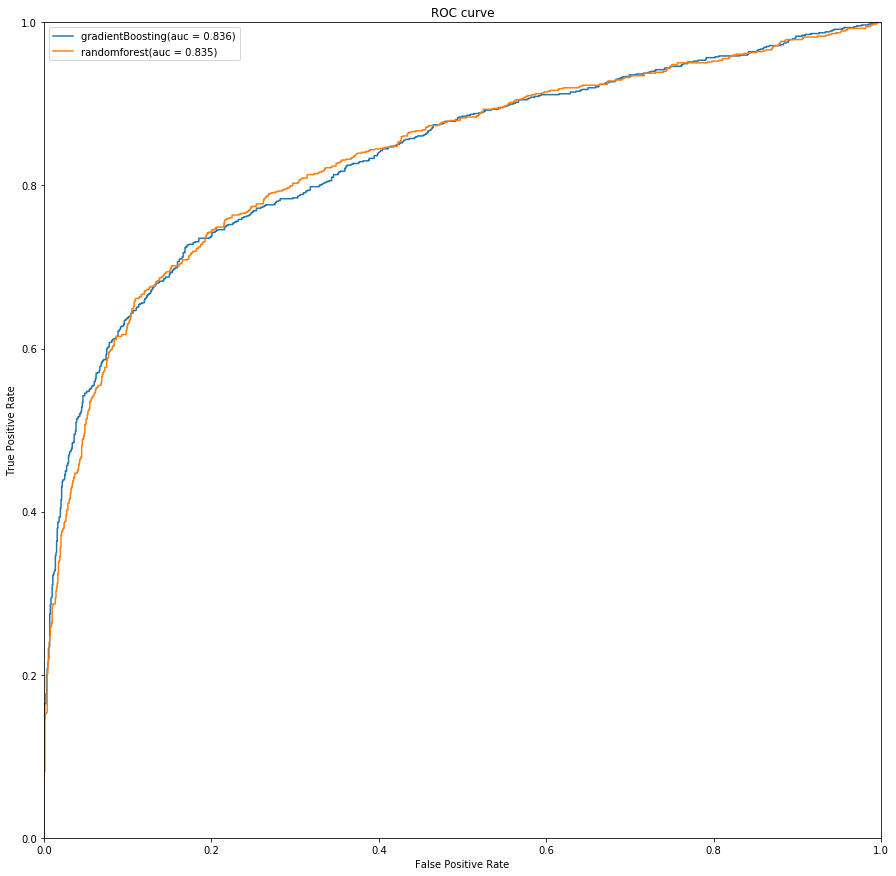

In [19]:
y_gb  = gb_clf.predict_proba(X_test_vectors)
curve_gb   = roc_curve(y_test, y_gb[:, 1])
auc_gb   = auc(curve_gb[0], curve_gb[1])

y_rf  = rf.predict_proba(X_test_vectors)
curve_rf   = roc_curve(y_test, y_rf[:, 1])
auc_rf   = auc(curve_rf[0], curve_rf[1])

plt.figure(figsize = (15,15))


plt.plot(curve_gb[0], curve_gb[1], label='gradientBoosting(auc = %0.3f)' % auc_gb)
plt.plot(curve_rf[0], curve_rf[1], label='randomforest(auc = %0.3f)' % auc_rf)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();